In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
#seperating dependent and independent columns
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [4]:
#scaling dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [5]:
#splitting dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [6]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [8]:
from sklearn.linear_model import LogisticRegression as LR
classifier=BC(estimator=LR(),n_estimators=150,n_jobs=-1,random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [10]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.79      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



In [11]:
from sklearn.ensemble import RandomForestClassifier as RFC 
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

ValueError: Found input variables with inconsistent numbers of samples: [17653, 4414]

In [24]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3559
           1       0.70      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.84      0.86      0.84      4414



In [ ]:
######tuning hyperparameters same as done in Decision Treee

In [25]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    
    predict=model.predict(x2)
    f2=f1_score(y2,predict)

    return f1,f2

In [26]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1 score')
    plt.show()

In [27]:
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
estimator=[i for i in range(1,600,10)]
train=[]
test=[]

for i in estimator:
    model=RFC(class_weight='balanced_subsample',
             n_estimators=i,
             n_jobs=-1,max_depth=7,random_state=101)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

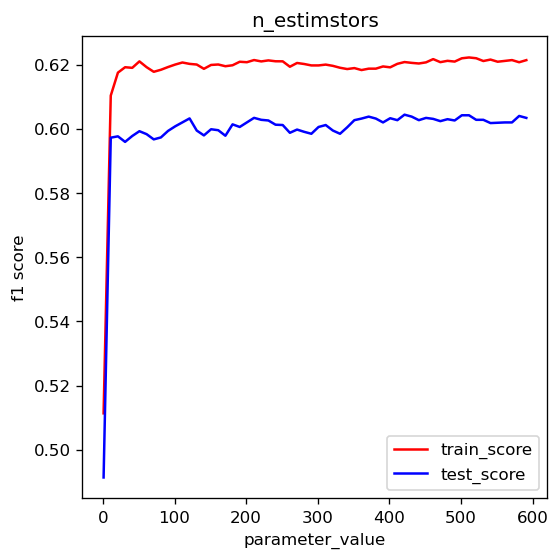

In [31]:
effect(train,test,range(1,600,10),'n_estimstors')

In [32]:
maxsamples=[i/1000 for i in range(1,1000)]
train=[]
test=[]

for i in maxsamples:
    model=RFC(class_weight='balanced_subsample',
             n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_samples=i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

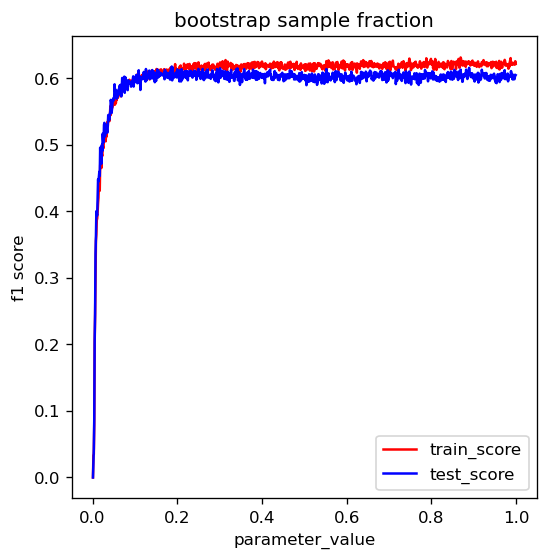

In [33]:
effect(train,test,maxsamples,'bootstrap sample fraction')

In [34]:
maxfeatures=range(1,X.shape[1])
train=[]
test=[]

for i in maxfeatures:
    model=RFC(class_weight='balanced_subsample',
             n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_features=i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

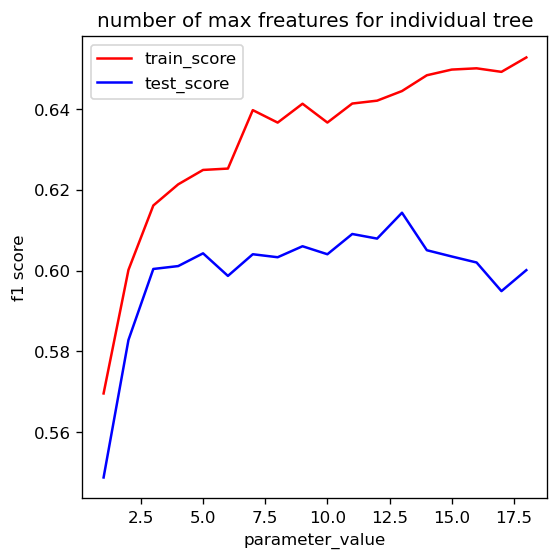

In [35]:
effect(train,test,maxfeatures,'number of max freatures for individual tree')